In [21]:
import pyGPs
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'Optimization'

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import os, os.path
import numpy as np
from matplotlib import pyplot as plt
#plt.style.use('ggplot')
get_ipython().magic('matplotlib inline')

#Obtener los archivos de datos.
DIR = 'DissolvedOxygenPrediction-master/database/'
files=([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
print(files)
n=len(files)
D=np.array([])
for i in range(0,len(files)):    
    source=DIR+files[i]
    file = open(source, "r")
    d=[]
    f=[]
    for line in file: 
        if len(line.split())>2:
            f.append(line.split()[2])        
        if len(line.split())==9:
            d.append(line.split()[7])
        elif len(line.split())==5:
            d.append(line.split()[3])
        else:
            d.append(0)
    d.pop(0)
    myarray = np.asarray(d)
    file.close()    
    D = np.append(D, np.transpose(myarray), axis=0)

D=D.reshape(n,int(D.shape[0]/n))
D=D.astype(np.float)

#Borar datos defectuosos/no adquiridos.
ind=[]
for j in range(0,len(D)):
    for i in range(0,len(D[0])):
        if D[j,i]==0:
            ind.append(i)
a=list(set(ind))
a=np.asarray(a)
Fech=np.asarray(f)
Fech=np.delete(Fech,ind)
Fech=np.arange(len(Fech))
RD=np.delete(D[0],ind)
PH=np.delete(D[1],ind)
DO=np.delete(D[2],ind)
EC=np.delete(D[3],ind)
T=np.delete(D[4],ind)

#Separa los conjuntos en Entrenamiento y Test.
PE=.75
PT=.25
n=np.around((DO.shape[0])*PE).astype(int)

DO_train=DO[0:n].astype(float)
DO_train.shape=(len(DO_train),1)
DO_test=DO[n:-1]
DO_test.shape=(len(DO_test),1)


EC_train=EC[0:n]
EC_train.shape=(len(EC_train),1)
EC_test=EC[n:-1]
EC_test.shape=(len(EC_test),1)


RD_train=RD[0:n]
RD_train.shape=(len(RD_train),1)
RD_test=RD[n:-1]
RD_test.shape=(len(RD_test),1)


T_train=T[0:n]
T_train.shape=(len(T_train),1)
T_test=T[n:-1]
T_test.shape=(len(T_test),1)


PH_train=PH[0:n]
PH_train.shape=(len(PH_train),1)
PH_test=PH[n:-1]
PH_test.shape=(len(PH_test),1)

Fech_train=Fech[0:n]
Fech_train=np.divide(Fech_train,float(len(Fech_train)))
Fech_test=Fech[n:-1]
Fech_test=np.divide(Fech_test,float(len(Fech_train)))

#Graficar los valores


#Métricas a utilizar.
def RMSE(obs,med):
    r=np.power(np.subtract(obs,med),2)
    return np.sqrt((1/len(obs)*np.sum(r)))

def NS(obs,med):
    mean=np.mean(obs)
    num=np.sum(np.power(np.subtract(obs,med),2))
    den=np.sum(np.power(np.subtract(obs,np.mean(obs)),2))
    return 1-num/den

def MARE(obs,med):
    num=np.subtract(obs,med)
    return (1/len(obs))*100*np.sum(np.absolute(np.divide(num,med)))

def R(obs,med):
    num=np.sum(np.multiply(np.subtract(obs,np.mean(obs)),np.subtract(med,np.mean(med))))
    den=np.multiply(np.sum(np.power(np.subtract(obs,np.mean(obs)),2)),np.sum(np.power(np.subtract(med,np.mean(med)),2)))
    return num/np.sqrt(den)

def Norm(x,X):
    return np.divide(np.subtract(x,np.mean(X)),np.sqrt(np.var(X)))
def DeNorm(x,X):
    return np.multiply(np.add(x,np.mean(X)),np.sqrt(np.var(X)))
fig=plt.figure()
Fech_train.shape=(Fech_train.shape[0],1)
Fech_test.shape=(Fech_test.shape[0],1)
plt.plot(Fech_train,DO_train,'-')
plt.plot(Fech_test,DO_test,'-')
plt.ylabel(r"""$Concentraci\'on\;de\;DO\; (mg/L)$""",fontsize=14)
plt.xlabel(r"""$Tiempo \; Normalizado$""",fontsize=14)
#plt.ylabel('Concentraci$\acute{o}$n de DO')
plt.grid()
plt.axis([0,1.34,6,17])
plt.axis
fig.savefig('temp.pdf', transparent=True)

fig=plt.figure()
plt.plot(Fech_train,PH_train,'-')
plt.plot(Fech_test,PH_test,'-')
plt.ylabel(r"""$Potencial\; de\; Hidr\'ogeno\;()$""",fontsize=14)
plt.xlabel(r"""$Tiempo \; Normalizado$""",fontsize=14)
#plt.ylabel('Concentraci$\acute{o}$n de DO')
plt.grid()
plt.axis([0,1.34,6.2,10])
plt.axis
fig.savefig('temp.pdf', transparent=True)

fig=plt.figure()
plt.plot(Fech_train,RD_train,'-')
plt.plot(Fech_test,RD_test,'-')
plt.ylabel(r"""$Caudal\;(m^3/s)$""",fontsize=14)
plt.xlabel(r"""$Tiempo \; Normalizado$""",fontsize=14)
#plt.ylabel('Concentraci$\acute{o}$n de DO')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.grid()
plt.axis([0,1.34,0,175000])
plt.axis
fig.savefig('temp.pdf', transparent=True)

['River_Discharge', 'Turbidity', 'pH', 'Dissolved_Oxygen', 'Electrical_Conductivity', 'Temperature']


ValueError: cannot reshape array of size 14266 into shape (6,2377)

In [1]:
train_days=Fech_train
train_target=Norm(DO_train,DO)
model = pyGPs.GPR()
sigma_noise = 1.0
sigma_rbf = 1.0
l_rbf = 1.0
k = pyGPs.cov.RBF(log_sigma=np.log(sigma_rbf), log_ell=np.log(l_rbf)) + pyGPs.cov.Const(log_sigma=np.log(sigma_noise))
model.setPrior(kernel = k)
print(model.covfunc.hyp)
model.getPosterior(train_days, train_target)
model.predict(train_days)
model.plot()

NameError: name 'Fech_train' is not defined

In [186]:
model.optimize(train_days,train_target)

1321.0262912
[ 0.04680122  1.49995106]


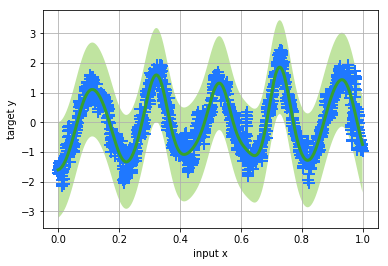

In [187]:
print(model.nlZ)
print(np.exp(model.covfunc.hyp))
extend_train_days = np.linspace(-0.15, 1.15, 200)
model.predict(train_days)
model.plot()


('Optimized negative log marginal likelihood:', 568.549)


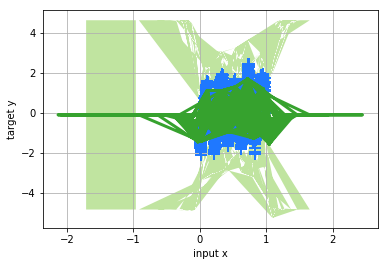

(553, 1)


ValueError: x and y must have same first dimension, but have shapes (1660, 1) and (553, 1)

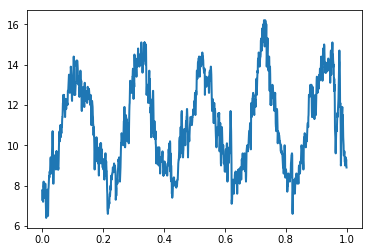

In [161]:
print ('Optimized negative log marginal likelihood:', round(model.nlZ,3))
model_P_DO.predict(Norm(DO_train,DO))         # predict test cases
model_P_DO.plot()
fig.savefig('temp.pdf', transparent=True)
mean=model.ym
var=model.ys2
print(mean.shape)
inf=mean - 2*np.sqrt(var)
sup=mean + 2*np.sqrt(var)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Fech_train,DO_train,lw=2)
ax.plot(Fech_train,mean,lw=2)
#ax.plot(Fech_test,PH_test,lw=2)
ax.fill_between(Fech_test[:,0], inf[:,0], sup[:,0],color='blue', alpha=0.2)
ax.set_title("My Plot Title")
ax.set_xlabel("Tiempo Normaliado")
ax.set_ylabel("This is the Y Axis")
ax.axis('on')
plt.axis([0 ,1.40, 0, 10])
plt.show()

In [129]:
model = pyGPs.GPR()      # specify model (GP regression)
k1 = pyGPs.Core.cov.Periodic()
k2= pyGPs.Core.cov.RBF()
k=k1*k2
model.setPrior(kernel=k)
model.getPosterior(Fech_train, PH_train) # fit default model (mean zero & rbf kernel) with data
model.optimize(Fech_train,PH_train)    # optimize hyperparamters (default optimizer: single run minimize)


('Optimized negative log marginal likelihood:', 568.549)


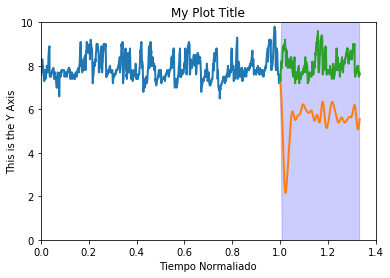

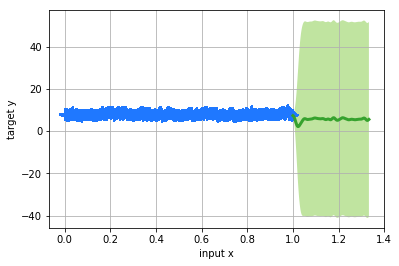

In [147]:
import matplotlib.pyplot as plt
print ('Optimized negative log marginal likelihood:', round(model.nlZ,3))
model.predict(Fech_test)         # predict test cases
mean=model.ym
var=model.ys2
inf=mean - 2*np.sqrt(var)
sup=mean + 2*np.sqrt(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Fech_train,PH_train,lw=2)
ax.plot(Fech_test,mean,lw=2)
ax.plot(Fech_test,PH_test,lw=2)
ax.fill_between(Fech_test[:,0], inf[:,0], sup[:,0],color='blue', alpha=0.2)
ax.set_title("My Plot Title")
ax.set_xlabel("Tiempo Normaliado")
ax.set_ylabel("This is the Y Axis")
ax.axis('on')
plt.axis([0 ,1.40, 0, 10])
plt.show()

model.plot()
fig.savefig('temp.pdf', transparent=True)

In [ ]:
# 

[0, 100, 0, 1000]

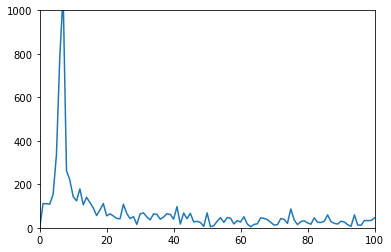

In [146]:
FDO=np.fft.fft(Norm(DO,DO))
plt.plot(np.abs(FDO))
plt.axis([0 ,100, 0, 1000])


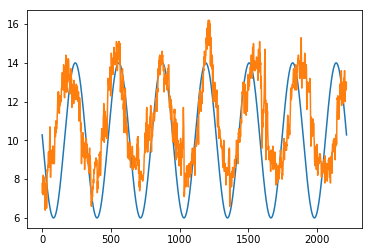

In [94]:
SP=DO.size
T=1
x = np.linspace(0.0, SP*T, SP)
y = 4*np.cos(2*np.pi*7*x+1.5)+10
plt.plot(x,y)
plt.plot(DO)

In [ ]:
inf=mean - 2*np.sqrt(var)
sup=mean + 2*np.sqrt(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Fech_train,DO_train,lw=2)
ax.plot(Fech_test,DO_test,lw=2)
ax.plot(Fech_test,mean,ls='-.')
ax.fill_between(Fech_test[:,0], inf[:,0], sup[:,0],color='blue', alpha=0.2)
ax.set_title("My Plot Title")
ax.set_xlabel("Tiempo Normaliado")
ax.set_ylabel("This is the Y Axis")
ax.axis('on')
plt.show()
fig.savefig('temp.pdf', transparent=True)